In [ ]:
gmimport numpy as np
from tqdm import tqdm
from PIL import Image
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
DATA_DIR = Path(r"C:\Users\patka\Downloads\Vision_artificial\archive")
SEED = 42

In [ ]:
IMG_SIZE = (48, 48)

X = []
y = []

classes = sorted([p.name for p in DATA_DIR.iterdir() if p.is_dir()])
print("Clases encontradas:", classes)

class_to_idx = {cls: idx for idx, cls in enumerate(classes)}

for cls in classes:
    class_dir = DATA_DIR / cls
    for img_path in tqdm(class_dir.rglob("*"), desc=f"Cargando {cls}"):
        if img_path.suffix.lower() not in [".jpg", ".jpeg", ".png"]:
            continue
        try:
            img = Image.open(img_path).convert("RGB")
            img = img.resize(IMG_SIZE)
            img = np.array(img, dtype=np.float32) / 255.0
            X.append(img.flatten())
            y.append(class_to_idx[cls])
        except Exception as e:
            print(f"Error con {img_path}: {e}")

Clases encontradas: ['Apple', 'Banana', 'Carambola', 'Guava', 'Kiwi', 'Mango', 'Orange', 'Peach', 'Pear', 'Persimmon', 'Pitaya', 'Plum', 'Pomegranate', 'Tomatoes', 'muskmelon']


Cargando Apple: 11192it [06:18, 29.53it/s]
Cargando Banana: 3027it [01:39, 30.48it/s]
Cargando Carambola: 2080it [01:07, 30.73it/s]
Cargando Guava: 19702it [10:04, 32.62it/s]
Cargando Kiwi: 8469it [04:36, 30.58it/s]
Cargando Mango: 4154it [02:13, 31.06it/s]
Cargando Orange: 3012it [01:41, 29.81it/s]
Cargando Peach: 2629it [01:27, 29.99it/s]
Cargando Pear: 3012it [01:36, 31.22it/s]
Cargando Persimmon: 2072it [01:08, 30.19it/s]
Cargando Pitaya: 2501it [01:21, 30.50it/s]
Cargando Plum: 2298it [01:14, 30.82it/s]
Cargando Pomegranate: 2167it [01:12, 29.83it/s]
Cargando Tomatoes: 2171it [01:17, 28.17it/s]
Cargando muskmelon: 2078it [01:07, 30.68it/s]


In [ ]:
X = np.array(X, dtype=np.float32)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (70549, 6912)
y shape: (70549,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=SEED
)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

pca = PCA(n_components=100, random_state=SEED)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


knn = KNeighborsClassifier(
    n_neighbors=5,
    weights="distance",
    metric="euclidean",
    n_jobs=-1
)

knn.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='euclidean', n_jobs=-1, weights='distance')

In [ ]:
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights="distance",
    metric="euclidean",
    n_jobs=-1
)

knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_jobs=-1, weights='distance')

In [ ]:
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=classes, labels=np.arange(len(classes))))

Accuracy: 0.8642097802976613
              precision    recall  f1-score   support

       Apple       0.81      0.85      0.83      2237
      Banana       0.92      0.72      0.80       606
   Carambola       0.80      0.77      0.78       416
       Guava       0.89      0.98      0.93      3940
        Kiwi       0.92      0.94      0.93      1693
       Mango       0.87      0.75      0.81       831
      Orange       0.95      0.70      0.81       602
       Peach       0.82      0.76      0.79       526
        Pear       0.75      0.77      0.76       602
   Persimmon       0.91      0.84      0.87       414
      Pitaya       0.90      0.74      0.81       500
        Plum       0.92      0.97      0.94       460
 Pomegranate       0.99      0.77      0.87       433
    Tomatoes       0.92      0.76      0.83       434
   muskmelon       0.59      0.82      0.69       416

    accuracy                           0.86     14110
   macro avg       0.86      0.81      0.83     141

<Figure size 2400x2000 with 0 Axes>

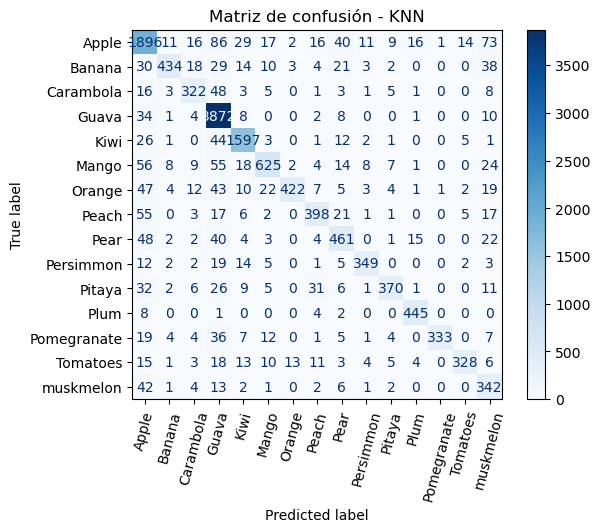

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(24, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[classes[i] for i in knn.classes_])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=75)
plt.title("Matriz de confusión - KNN")
plt.show()
plt.close()

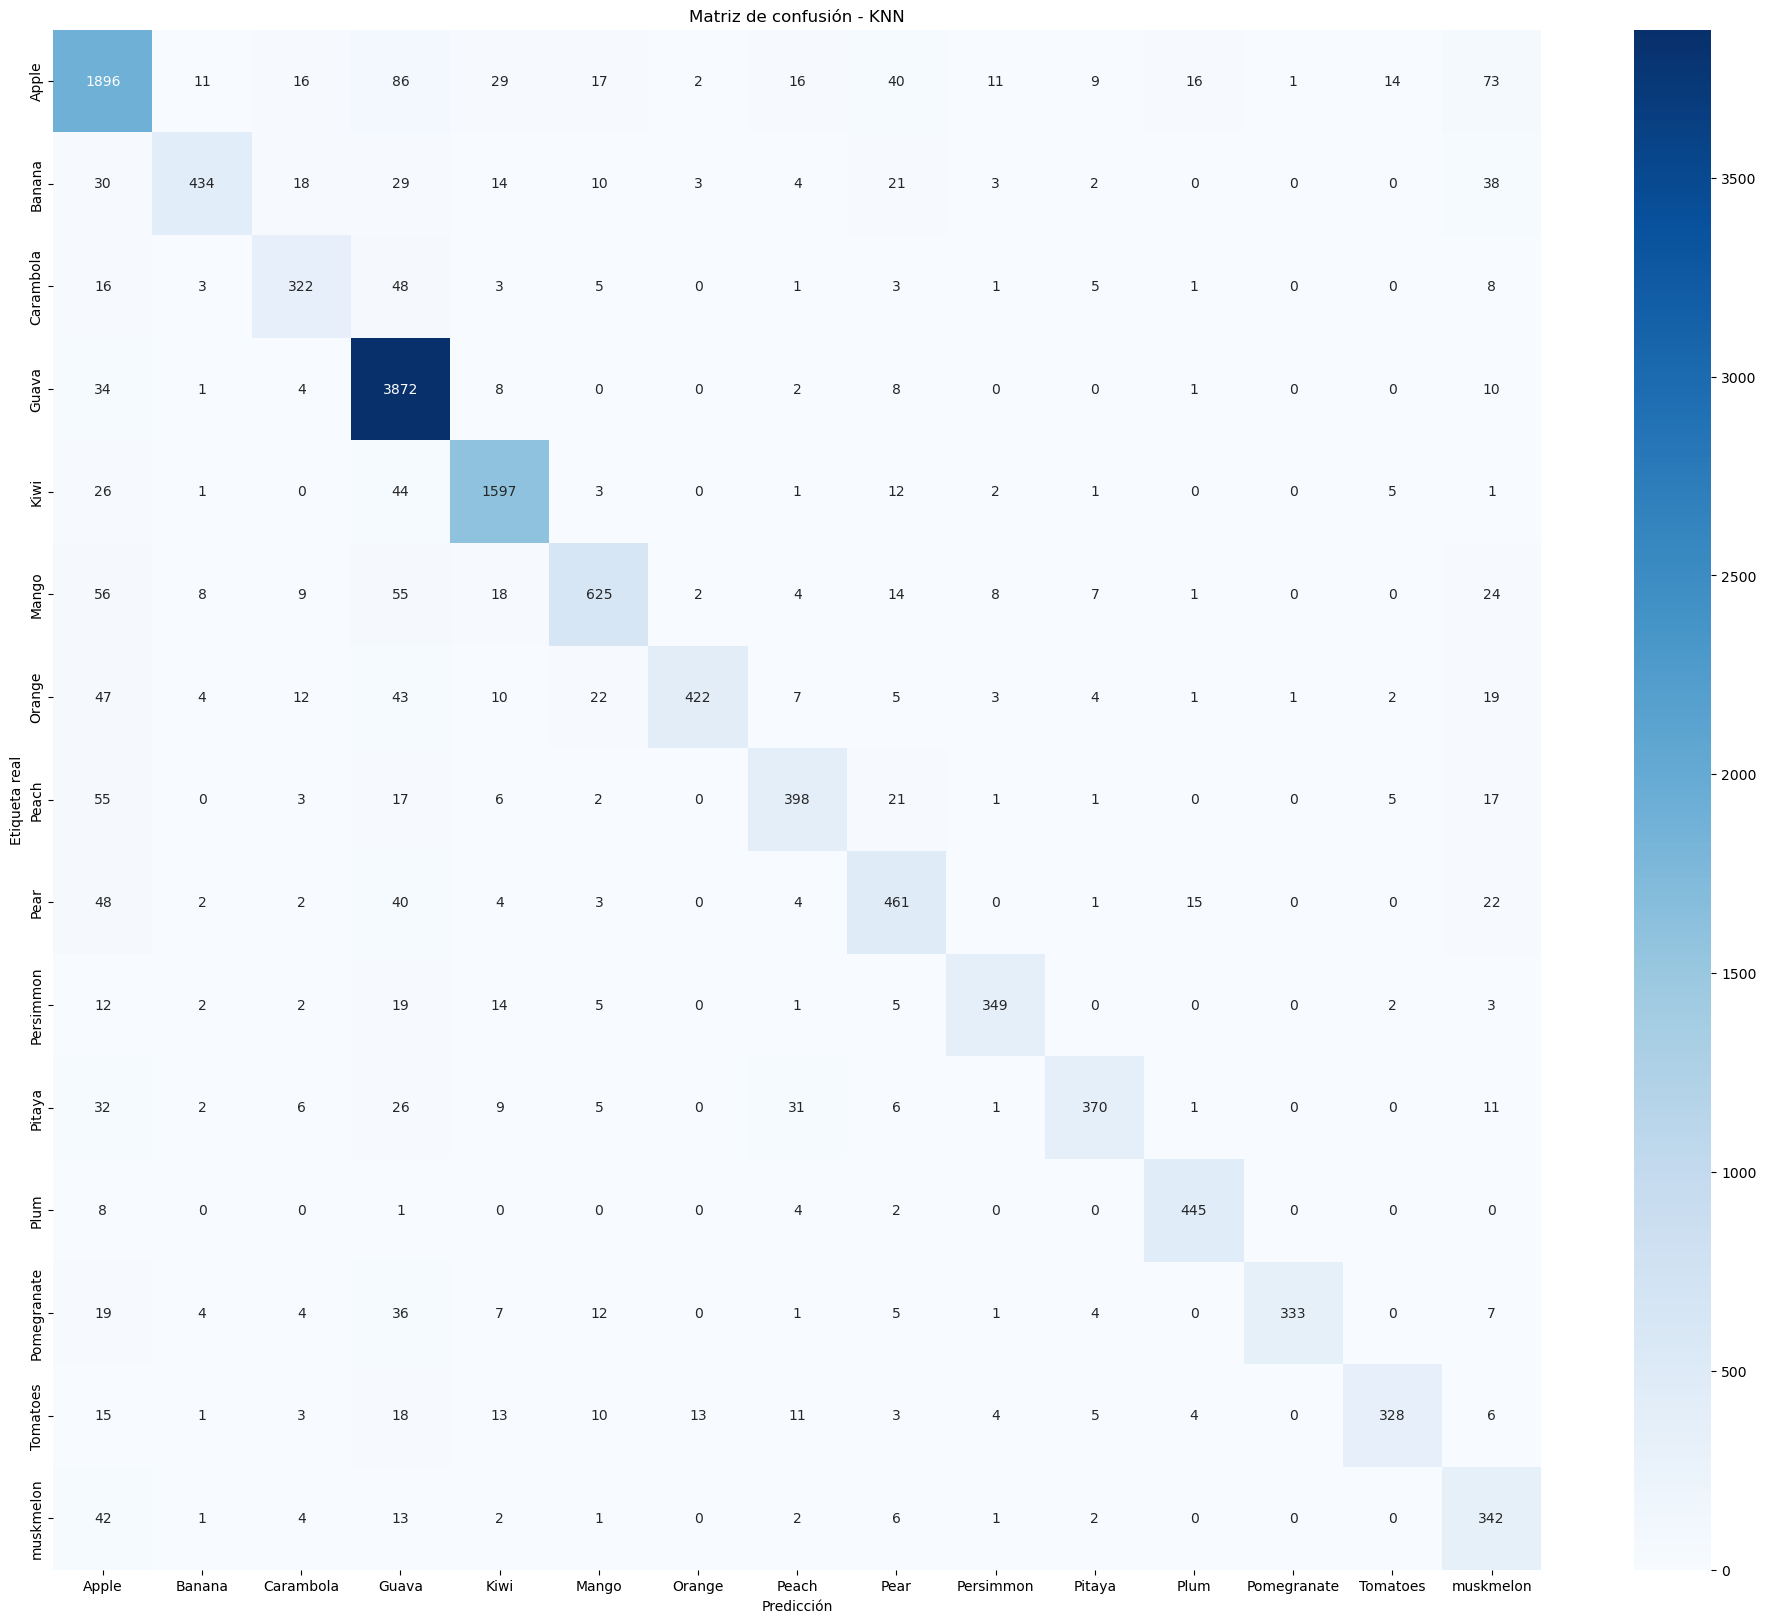

In [ ]:
import seaborn as sns

plt.figure(figsize=(24, 20))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap="Blues",
    xticklabels=classes,
    yticklabels=classes
)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de confusión - KNN")
plt.show()

Normalized confusion matrix


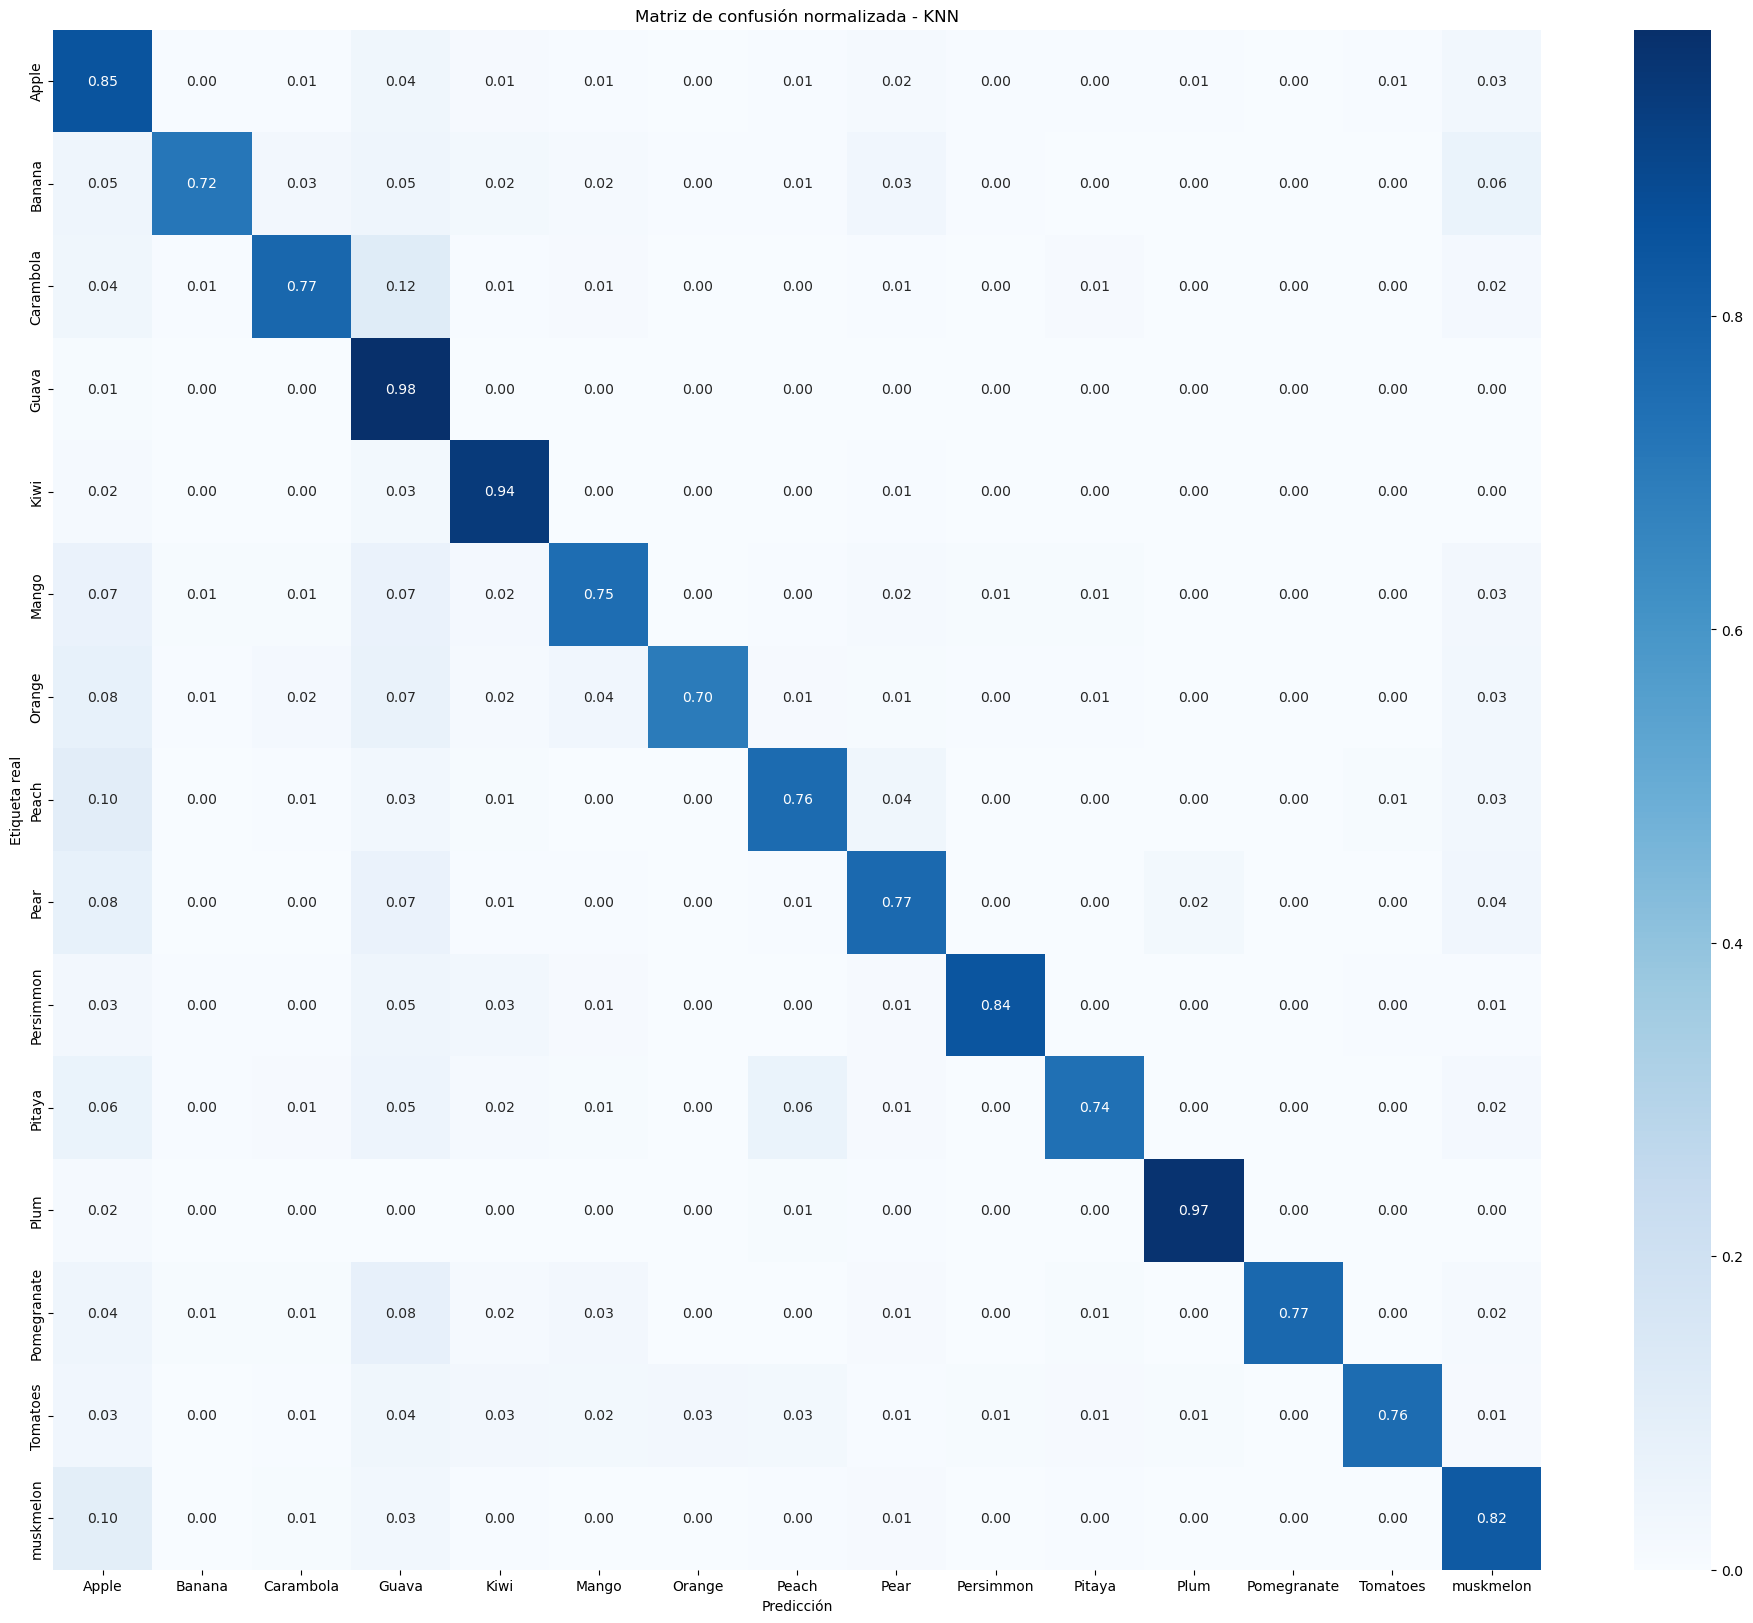

In [ ]:
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')

plt.figure(figsize=(24, 20))
sns.heatmap(
    cm_norm,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    xticklabels=classes,
    yticklabels=classes
)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de confusión normalizada - KNN")
plt.show()